# Geometric Interpretation of a First-Order Differential Equations

## Using A Jupyter Notebook
This is a Jupyter notebook. That means all the material in this notebook is live . You can edit the code and see how things change.
Indeed, you will be asked to do exactly that in many of the exercises. The code is in the Python language. If you are not familiar with 
Python, that won't be a problem. You will only have to edit very specific lines and there will be comments (lines starting with a pound
(hashtag) symbol in green italics) pointing you to where you will make a change. The block of code below imports some useful libraries and defines 
some functions that will be used to create the graphs in the activity. While you are welcome look over this block of code if you are interested (click on the three dots to make the code visible), you can jump down to the "Slope Fields" section without missing anything. 

In [103]:
# Defining functions and importing libraries that will be used in this activity
# Don't change this

import math
import matplotlib.pyplot as plt
from IPython.display import Image, display

# Define the right-hand side of the differential equations
def rhs0(x,y) :
    return x+y+1
#    return math.sin(math.pi*y/2)

# Define the exact solution to y' = rhs0(x,y)
def f0(x,c) :
    return -x-2+c*math.exp(x)

# Compute the endpoints of the segments that make up the slope field
def slopefield(rhs0):
    a=[]
    delta=0.2
    for x in range(-4,5) :
        for y in range(-4,5) :
            m=rhs0(x,y)
            if abs(m)<1000 :
                deltap=delta/math.sqrt(1+m*m)
                x0=x-deltap/2
                y0=y-m*deltap/2
                x1=x+deltap/2
                y1=y+m*deltap/2
            else :
                # If abs(slope)>1000 treat as vertical
                x0=x
                x1=x
                y0=y-delta/2
                y1=y+delta/2
            a.append([[x0,x1],[y0,y1]])
    return a

def slopefieldnew(rhs) :
    a=[]
    b=[]
    dx=[]
    dy=[]
    delta=0.2
    for x in range(-4,5) :
        for y in range(-4,5) :
            a.append(x)
            b.append(y)
            m=rhs(x,y)
            if abs(m)<1000 :
                deltap=delta/math.sqrt(1+m*m)
                dx.append(deltap)
                dy.append(m*deltap)
            else :
                dx.append(0)
                dy.append(delta)
    print(len(a))
    print(len(b))
    return([a,b,dx,dy])
                

# Plot a slopefield
def plotslopes(a):
    x0=[]
    y0=[]
    dx=[]
    dy=[]
    for n in range(len(a)):
        x0=a[n][0][0]
        y0=a[n][1][0]
        x1=a[n][0][1]
        y1=a[n][1][1]
        dx=x1-x0
        dy=y1-y0
        #x0.append(a[n][0][0])
        #y0.append(a[n][1][0])
        #dx.append(a[n][0][1]-a[n][0][0])
        #dy.append(a[n][1][1]-a[n][1][0])
#        plt.plot(a[n][0],a[n][1],'b-')
#    plt.quiver([x0,y0],dx,dy,'b')
        plt.arrow(x0,y0,dx,dy,color='blue',head_width=.1)

def plotslopesnew(a):
    print(len(a[0]))
    print(len(a[1]))
    plt.quiver([a[0],a[1]],a[2],a[3],'b')

                  
# Improved Euler method to numerically approximate an integral curve
def impeul(rhs,yinit):
    h=8.5/50
    x0=-4
    y0=yinit
    datax=[x0]
    datay=[y0]
    x=x0
    y=y0
    for n in range(51) :
        m0=rhs(x,y)
        m1=rhs(x+h,y+m0*h)
        x=x+h
        y=y+h*(m0+m1)/2
        datax.append(x)
        datay.append(y)
    return [datax,datay]

def draw33ic(rhs):
    for k in range(-16,17):
        yinit=k/4
#        [u,v]=impeul(rhs,yinit)
        [u,v]=rkf23(rhs,-4,yinit,4.5)
        plt.plot(u,v,'r-')

# Runge-Kutta-Fehlberg(23) method to numerically approximate an integral curve
def rkf23(f,x0,y0,tfinal):
    tol=0.005
    maxcyc=500
    minpts=20
    chicken=0.9
    datax=[x0]
    datay=[y0]
    x=x0
    y=y0
    h=(tfinal-x0)/50
    hmax=2.5*h
    counter=0
    numcyc=0
    while (x<tfinal and counter<6 and numcyc<maxcyc):
        counter+=1
        numcyc+=1
        m0=f(x,y)
        m1=f(x+h,y+m0*h)
        y1=y+h*(m0+m1)/2
        m2=f(x+h/2,y+h*(m0+m1)/4)
        y2=y+h*(m0+m1+4*m2)/6
        truncerr=abs(y2-y1)
        if (truncerr<tol*(abs(y2)+1)) :
            x=x+h
            y=y2
            datax.append(x)
            datay.append(y)
            counter=0
        if truncerr>tol/8 :
            h=chicken*h*((tol/truncerr)**(1/3))
        else :
            h=2*chicken*h
        if h>hmax : h=hmax
        if x+h>tfinal : h = tfinal-x
    return [datax,datay]



## Slope Fields

Consider a first-order differential equation, $y'=f(x,y)$. Since the derivative is the slope of the tangent line, 
we interpret this equation geometrically to mean that at any point $(x,y)$ in the plane, the tangent line must have slope $f(x,y)$.
We illustrate this with a slope field, a graph where we draw a short line segment indicating the slope at a grid of points. A
slope filed for $y' = x + y + 1$ is created below.

The solution to a first-order differential equation is a curve that is tangent to the slope field at every point along
the curve. Since differential equations are solved by integrating, we call such a curve an integral curve. For example, $y=-x-2+e^x$ is 
a solution to the differential equation $y' = x + y + 1$, and when we plot it along with the slope field, you can see how the graph of
$y=-x-2+e^x$ flows along the slope field.

(-5.0, 5.0)

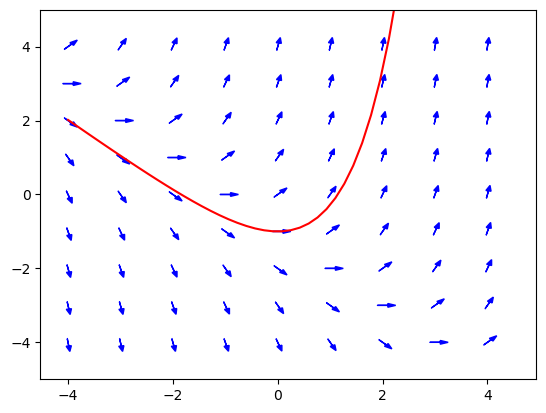

In [106]:
# Compute the slopefield for y' = rhs0(x,y) (where rhs0 was defined in the initial block of code)
a=slopefield(rhs0)

# Plot the slopefield
plotslopes(a)

# Compute points on the graph of y = -x - 2 + exp(x) = f0(x,1) (defined in the initial code block)
x=[]
y=[]
for n in range(51):
    x1=-4+8.5*n/50
    y1=f0(x1,1)
    x.append(x1)
    y.append(y1)

# Plot the graph
plt.plot(x,y,'r-')
plt.ylim(-5,5)

Now just as there are infinitely many solutions to $y' = x + y + 1$, there are infinitely many different integral curves. 
We draw 33 of them below

(-5.0, 5.0)

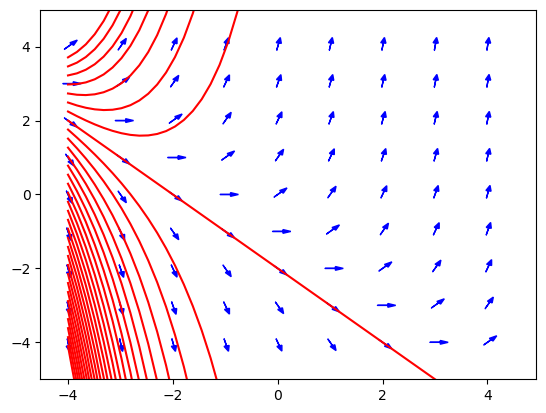

In [109]:
for k in range(33):
    x=[]
    y=[]
    c=(-1000+k*40)/3
    for n in range(51):
        t=-4+8.5*n/50
        x.append(t)
        y.append(f0(t,c))
    plt.plot(x,y,'r-')

#for n in range(len(a)) :
#    plt.plot(a[n][0],a[n][1],'b-')

plotslopes(a)

plt.ylim(-5,5)

## Exercises

In this activity you will experiement with the slope fields and integral curves for a variety of different equations. The
goal is to get a geometric concept of what a differential equation means to go along with the algebra techniques you
have been learning to solve such equations. There are many equations where we can't write a formula for the solution (even implicitly), 
and there are other situations where looking at the slope field may tell us more than looking at the formula for the slope field. 
For example, the general solution to the equation $y' = \sin(x+y)$ is $y=2\tan^{-1}(-1-2/(x+C))-x$. Most people find that the slope field
gives them a better sense of the behavior of the solution than the formula (this is the default equation that you will adjust below).
It is also the case that there is a reasonable chance of making a small (or large) error in working out a complicated solution like this. 
Being able to plot the solution against the slope field can give you a useful check that you haven't slipped up somewhere along the way.

The first two exercises ask you to look at a slope field and find an integral curve with some specific property. This will probably take
you several guesses, and that is deliberate. To build your intuition, you need to look at a number of examples. After that, you will have
a couple of questions to be sure you recognize some properties of integral curves that will make plausible the following result.

<b>Any "reasonable" initial value problem has a unique solution that is defined in some interval about the initial point.</b>

A solution is "unique" if there is only one solution. We won't worry about exactly what "reasonable" means right now, but any equation
you are likely to encounter will be reasonable. This result shouldn't be too surprising. After all, you can build
an integral curve by starting at the initial point and following the slope field. But you should think a bit about why 
<ol>
    <li> there is a unique solution, and</li>
    <li> why it might only cover an interval and not the whole real line.</li>
</ol>

The final four exercises will have you look at some special sorts of equations and learn to recognize them and their integral curves. Note that there are a total of 8 exercises (don't forget to scroll down to see all 8). The notion of an autonomous equation in 
exercise 6 is particularly useful and we will see later how these concepts can help analyze population models. 

You can edit the block of code below to change the differential equation and the initial value. You will be able to update the function on the 
right-hand side of the equation, $y' = rhs(x,y)$ and the initial value, $y(-4)=y_0$ to pick a 
specific integral curve that will be drawn in black. The graph will initially plot 
33 integral curves in red to give you an overview of how the integral curves look.
Since you are updating the equation, the system won't know the exact solution, so
the integral curve will be drawn numerically by following the slope field. The technique we will use is the Runge-Kutta-Fehlberg method.
This is a variant of Euler's method as referred to in the movie, "Hidden Figures" (Fehlberg
worked for NASA). We will discuss different numerical methods later. For now, carry out the exercises below and write up
your answers. The exercises all use the same block of code which is listed below. The specific exercises are given below the code block.

(-5.0, 5.0)

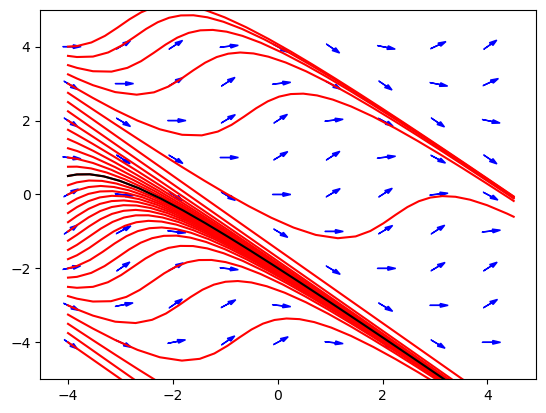

In [135]:
# Define the right-hand side for y' = rhs(x,y)
def rhs(x,y):
    try : 
        # Update the line below 
        m=math.sin(x+y)
    except :
        # Catch divide by 0 or other error. Setting slope to 10000 allows
        # the program to continue and gives a line that looks vertical corresponding to 
        # an infinite slope. (Don't change this unless you know what you are doing)
        m=10000
    return m

# Update the line below to pick a value for y(-4)=y0
y0=0.5

# The line below draws 33 integral curves in red
# Comment it out (put a # at the start of the line) if you don't want this
draw33ic(rhs)

# Draw the slopefield (don't change this)
a=slopefield(rhs)
plotslopes(a)

# Draw the specific integral curve for y(-4)=y0 in black (don't change this)
[u,v]=rkf23(rhs,-4,y0,4.5)
plt.plot(u,v,'k-')

# Set limits on y values so you can see the key part of the slope field clearly even 
# if the integral curve gets very large
plt.ylim(-5,5)


### Exercise 1:
Let $y'=y-x/2$. Find a value for $y(-4)=y_0$ so that $-2 < y(4) < 2$.

You can (and should) edit the code above so you can experiment with different choices for $y_0$. Update the formula for <code>rhs(x,y)</code> to <code>m=y-x/2</code> and update the value of <code>y0</code> to whatever value you want in the block of code above and press Shift-Enter to recompute.

### Exercise 2
Let $y'=\cos(x)+\sin(y)$. Find a value for $y(-4)=y_0$ so that $-2 < y(4) < 2$.

You can (and should) edit the code above so you can experiment with different choices for $y_0$. Update the formula for <code>rhs(x,y)</code> to <code>math.cos(x)+math.sin(y)</code> and update the value of <code>y0</code> to whatever value you want in the 
block of code above and press Shift-Enter to recompute.

### Exercise 3
In the first two problems, you almost certainly observed and used (if only implicitly) that integral curves don't cross to narrow the
range of possible values for $y_0$ to try. <b>Explain in a couple of (complete) sentences how this fact implies that a "reasonable" initial value problem can't have two different solutions.</b>

### Exercise 4
Consider the equation $y' = -(x+2)/y$. Update the formula for <code>rhs(x,y)</code> to 
<code>m=-(x+2)/y</code> and press Shift-Enter to recompute. 
The solutions 
appear to loop back on themselves. But we are looking for <em>functions</em> which means the solutions must satisfy the vertical line test, i.e. they can't loop back on themselves. If you count, you'll find there are only half the 33 solutions we expect. What is happening here is that each loop actually is comprised of two solutions, one for the top half and one for the bottom. And each solution terminates after a finite interval. Think about where the solutions seem to terminate and why might go wrong there. <b>Write a couple of sentences about what is happening in this exampl.</b>
(Note: There are other ways for solutions to only work on a limited interval besides the issue here. We will discuss this more later).
>

### Exercise 5
Look at several examples of the form $y'=rhs(x)$ where the right-hand side depends only on $x$ and not $y$. You should observe 
a pattern in such fields. Be sure to draw the 33 initial curves. <b>Write several sentences to describe how
you can tell if a slope field corresponds to such an equation and describe how the integral curves behave.</b>

### Exercise 6
Look at several examples of the form $y'=rhs(y)$ where the right-hand side depends only on $y$ and not $x$ (such equations 
are called <em>autonomous</em>). You should observe a pattern in such fields. Do the integral curves have the same sort of behavior
as in previous problem? <b>Write several sentences to describe how you can tell if a slope field corresponds to 
such an equation and compare how the integral curves behave.</b>

### Exercise 7
Below is the slope field for $y' = f(x,y)$. Based on the graph, identify where the function $f(x,y)$ is positive, negative, and 0.
Is $f(x,y)$ a function of $x$ alone, $y$ alone, or a function of both variables together? <b>Find a function $f(x,y)$ whose slope field looks 
like this.</b>

In [122]:
image_path="//www.math.ksu.edu/academics/academic_resources/books/340/pictures/sflabx7.png"
display(Image(url=image_path))

### Exercise 8
Below is the slope field for $y' = f(x,y)$. 
Based on the graph, identify where the function $f(x,y)$ is positive, negative, and 0.
Is $f(x,y)$ a function of $x$ alone, $y$ alone, or a function of both variables 
together? <b>Find a function $f(x,y)$ whose slope field looks like this.</b>

In [125]:
image_path="//www.math.ksu.edu/academics/academic_resources/books/340/pictures/sflabx8.png"
display(Image(url=image_path))

In [2]:
import os; print(os.getcwd())


C:\Users\bennett
